In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
# parameters
test_size = 0.2

#test according to the box jenkins method

In [2]:
# read data
data = pd.read_csv('../output-single/link_kpis_total_15min_intervals.csv',index_col=0)
# convert to datetime and set as index
data.set_index('datetime', inplace=True)
data.index = pd.to_datetime(data.index)
data

,start_stop,end_stop,weighted_avg_headway,weighted_avg_speed,weighted_avg_time,no_of_trips
datetime,,,,,,
2024-01-29 10:00:00,PF_A01_1,PF_B01_1,12.408333,14.722512,1.414783,115.0
2024-01-29 10:15:00,PF_A01_1,PF_B01_1,10.592529,14.511484,1.426754,190.0
2024-01-29 10:30:00,PF_A01_1,PF_B01_1,11.185676,14.434930,1.437135,228.0
2024-01-29 10:45:00,PF_A01_1,PF_B01_1,13.865204,14.637638,1.423482,269.0
2024-01-29 11:00:00,PF_A01_1,PF_B01_1,10.505591,14.554157,1.429492,295.0
...,...,...,...,...,...,...
2024-03-25 04:15:00,PF_N12_C,PF_N11_C,39.103261,22.816955,11.991667,46.0
2024-03-25 04:30:00,PF_N12_C,PF_N11_C,23.964035,15.449527,11.529825,19.0
2024-03-25 05:00:00,PF_N12_C,PF_N11_C,15.416667,6.409373,18.350000,1.0


In [3]:
# filter by start stop and end stop
start_stop = 'PF_A02_C'
end_stop = 'PF_A01_1'

linkData = data[(data['start_stop'] == start_stop) & (data['end_stop'] == end_stop)]
linkData

,start_stop,end_stop,weighted_avg_headway,weighted_avg_speed,weighted_avg_time,no_of_trips
datetime,,,,,,
2024-01-29 10:00:00,PF_A02_C,PF_A01_1,12.054668,21.568098,2.112281,114.0
2024-01-29 10:15:00,PF_A02_C,PF_A01_1,10.592529,21.616313,2.107018,190.0
2024-01-29 10:30:00,PF_A02_C,PF_A01_1,11.184671,21.814639,2.096711,228.0
2024-01-29 10:45:00,PF_A02_C,PF_A01_1,13.862466,22.202748,2.078810,269.0
2024-01-29 11:00:00,PF_A02_C,PF_A01_1,10.510198,22.271370,2.065593,295.0
...,...,...,...,...,...,...
2024-03-25 04:00:00,PF_A02_C,PF_A01_1,17.487955,16.328915,5.482955,44.0
2024-03-25 04:15:00,PF_A02_C,PF_A01_1,15.688210,7.953485,11.365432,27.0
2024-03-25 04:30:00,PF_A02_C,PF_A01_1,12.215903,12.089271,13.704167,12.0


In [4]:
# stationarity test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='BIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(linkData['weighted_avg_headway'])

Results of Dickey-Fuller Test:
Test Statistic                -1.156975e+01
p-value                        3.122987e-21
#Lags Used                     4.000000e+00
Number of Observations Used    4.419000e+03
Critical Value (1%)           -3.431831e+00
Critical Value (5%)           -2.862194e+00
Critical Value (10%)          -2.567118e+00
dtype: float64


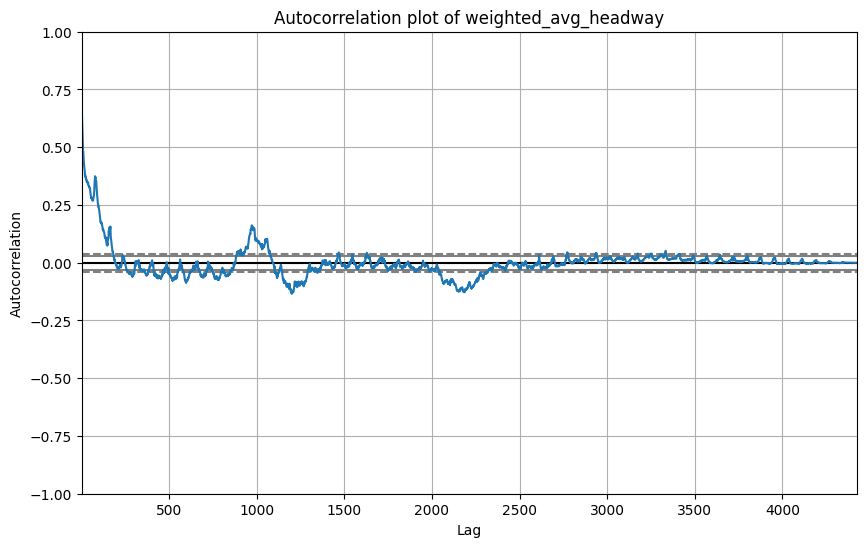

In [5]:
# auto-correlation plot
plt.figure(figsize=(10, 6))
pd.plotting.autocorrelation_plot(linkData['weighted_avg_headway'])
plt.title('Autocorrelation plot of weighted_avg_headway')
plt.show()

In [6]:
# test split data
train, test = train_test_split(linkData['weighted_avg_headway'], test_size=test_size, shuffle=False)

In [7]:
# fit ARIMA model
model = ARIMA(train, order=(12,1,0))
model_fit = model.fit()
model_fit.summary()

c:\Dev\fyp\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Dev\fyp\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Dev\fyp\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     weighted_avg_headway   No. Observations:                 3539
Model:                  ARIMA(12, 1, 0)   Log Likelihood               -8501.789
Date:                  Wed, 26 Feb 2025   AIC                          17029.577
Time:                          16:02:31   BIC                          17109.804
Sample:                               0   HQIC                         17058.194
                                 - 3539                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3752      0.006    -66.972      0.000      -0.386      -0.364
ar.L2         -0.3421      0.006    -54.747      0.000      -0.354      -0.330
ar.L3         -0.2370      0.010    -23.612      0.000      -0.257      -0.217
ar.L4         -0.1899      0.011    -16.731      0.000      -0.212      -0.168
ar.L5         -0.1358      0.013    -10.466      0.000      -0.161      -0.110
ar.L6         -0.1253      0.014     -9.204      0.000      -0.152      -0.099
ar.L7         -0.1050      0.015     -6.934      0.000      -0.135      -0.075
ar.L8         -0.0939      0.016     -5.859      0.000      -0.125      -0.063
ar.L9         -0.1097      0.015     -7.299      0.000      -0.139      -0.080
ar.L10        -0.0773      0.017     -4.597      0.000      -0.110      -0.044
ar.L11        -0.0261      0.018     -1.464      0.143      -0.061       0.009
ar.L12        -0.0639      0.016     -3.963      0.000      -0.095      -0.032
sigma2         7.1561      0.052    138.656      0.000       7.055       7.257
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):            154268.57
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.63   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
rolling_predictions = []
history = list(train)

for t in range(len(test)):
    # fit the ARIMA model on the current history
    model = ARIMA(history, order=(12,1,0))
    model_fit = model.fit()
    # forecast the next value
    pred = model_fit.forecast()[0]
    rolling_predictions.append(pred)
    # update history with the actual value
    history.append(test.iloc[t])

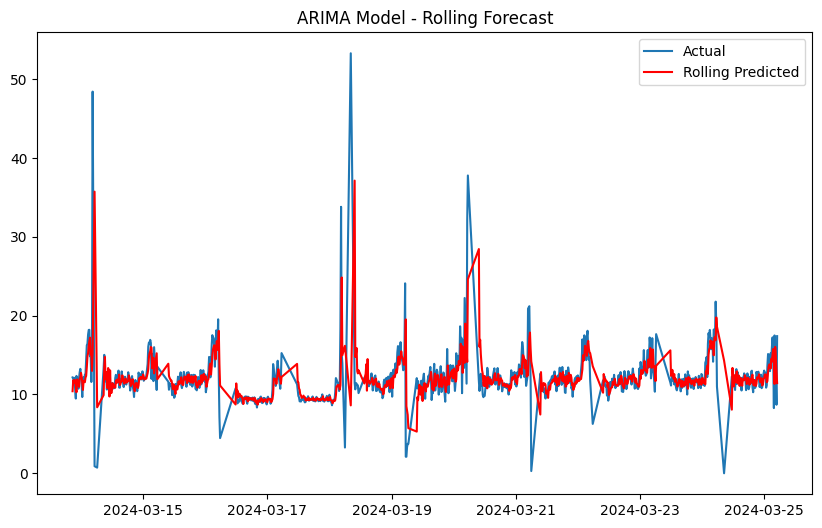

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(test, label='Actual')
plt.plot(test.index[:len(rolling_predictions)], rolling_predictions, color='red', label='Rolling Predicted')
plt.title('ARIMA Model - Rolling Forecast')
plt.legend()
plt.show()

In [10]:
# calculate RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test[:len(rolling_predictions)], rolling_predictions))
print(f'RMSE: {rmse}')

RMSE: 3.2538385655331106
